<a href="https://colab.research.google.com/github/Rohita-G/rohita-gangishetty-700750412/blob/main/icp7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import max_norm
from keras.optimizers import SGD
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
import tensorflow as tf

#from keras import backend as K
#K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train =to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
epochs = 25
learning_rate = 0.001
decay = learning_rate/epochs
momentum = 0.9
nesterov = True
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=learning_rate, momentum=momentum,decay=decay, nesterov=nesterov)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 64)        0         
                                                      

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
from tensorflow.keras.models import load_model
model.save('/content/drive/My Drive/model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
import numpy
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
# Load the CIFAR-10 dataset and normalize it
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_test = X_test.astype('float32') / 255.0
# One-hot encode the actual labels for comparison
y_test = to_categorical(y_test)
model = load_model('/content/drive/My Drive/model.h5')
# Predict the first 4 images
num_images_to_predict = 4
predictions = model.predict(X_test[:num_images_to_predict])
# Convert predictions to class labels
predicted_labels = numpy.argmax(predictions, axis=1)
actual_labels = numpy.argmax(y_test[:num_images_to_predict], axis=1)
# Compare predictions with actual labels
for i in range(num_images_to_predict):
    print(f"Predicted: {predicted_labels[i]}, Actual: {actual_labels[i]}")

1/1 [==============================] - 0s 169ms/step
Predicted: 3, Actual: 3
Predicted: 8, Actual: 8
Predicted: 8, Actual: 8
Predicted: 0, Actual: 0


Epoch 1/5
1563/1563 [==============================] - 504s 322ms/step - loss: 0.7557 - accuracy: 0.7339 - val_loss: 0.7992 - val_accuracy: 0.7173
Epoch 2/5
1563/1563 [==============================] - 498s 319ms/step - loss: 0.7424 - accuracy: 0.7394 - val_loss: 0.7595 - val_accuracy: 0.7362
Epoch 3/5
1563/1563 [==============================] - 499s 319ms/step - loss: 0.7257 - accuracy: 0.7448 - val_loss: 0.7548 - val_accuracy: 0.7373
Epoch 4/5
1563/1563 [==============================] - 521s 333ms/step - loss: 0.7127 - accuracy: 0.7487 - val_loss: 0.7511 - val_accuracy: 0.7390
Epoch 5/5
1563/1563 [==============================] - 480s 307ms/step - loss: 0.6946 - accuracy: 0.7538 - val_loss: 0.7454 - val_accuracy: 0.7387


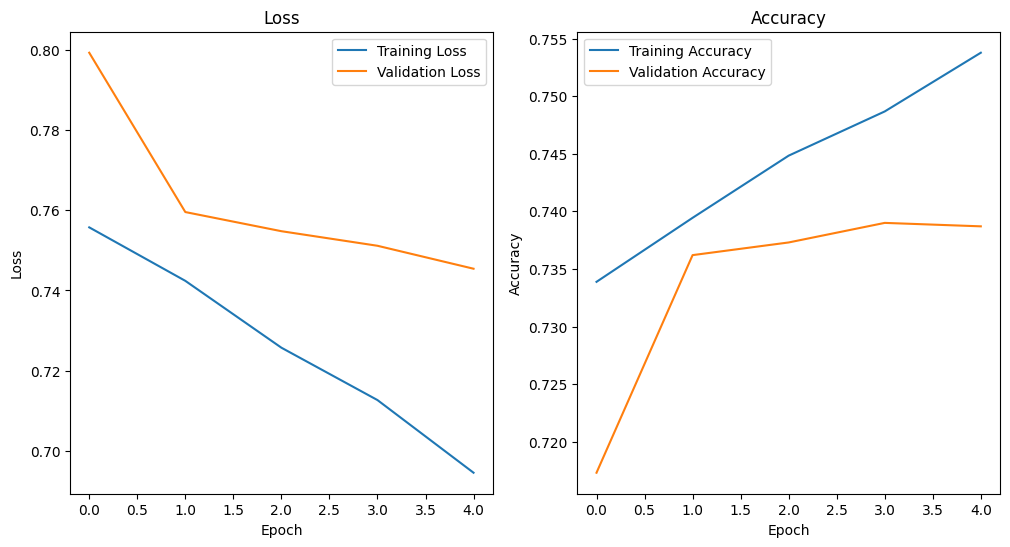

In [21]:
import numpy
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset and normalize it
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create and train the model
model = Sequential()
loaded_model = load_model('/content/drive/My Drive/model.h5')

# Now, you can visualize loss and accuracy using the 'history' object
history = loaded_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

# Visualize loss and accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
